First run in the terminal:
```
 python whamp_wrapper.py
```
This will execute the script and run the WHAMP model with the specified parameters, including a parameter sweep for different A values.

In [38]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
sys.path.append('../src')  # Adjust path as needed
import whamp_wrapper as ww  # Import the wrapper module for WHAMP functions


# Cell 3: Load your data
filename = '/Users/u0167590/github/whamp/results/parallel_firehose_sweep2.txt'
df_raw = ww.read_whamp_output(filename)
# Display basic info about the data
if df_raw is not None:
    print(f"Data loaded successfully!")
    print(f"Shape: {df_raw.shape}")
    print(f"\nColumn names: {list(df_raw.columns)}")
    print(f"\nUnique A values: {sorted(df_raw['A'].unique())}")
    print(f"\nUnique BETA values: {sorted(df_raw['BETA'].unique())}")
    print(f"\nFirst few rows:")
    print(df_raw.head())
    
    # Group by A value to see data structure
    print(f"\nData grouped by A value:")
    #for beta_val in sorted(df['BETA'].unique()):
        #print(f"\nBETA = {beta_val}:")
        #for a_val in sorted(df['A'].unique()):
        #    subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
        #    subset1e3 = df[(df['A'] == a_val) & (df['BETA'] == beta_val) & (df['omega_r'] > 1e3)]
        #    print(f"A = {a_val}, BETA = {beta_val}: {len(subset)} entries with {len(subset1e3)} entries above omega_r > 1e3")
    print(f" Total number of entries {len(df_raw)}, total number of omega_r > 1e3: {len(df_raw[df_raw['omega_r'] > 1e3])}")
else:
    print("Failed to load data")

Data loaded successfully!
Shape: (31936, 12)

Column names: ['p', 'z', 'omega_r', 'omega_i', 'EX_real', 'EX_imag', 'EY_real', 'EY_imag', 'EZ_real', 'EZ_imag', 'BETA', 'A']

Unique A values: [np.float64(0.1), np.float64(0.1129), np.float64(0.1274), np.float64(0.1438), np.float64(0.1624), np.float64(0.1833), np.float64(0.2069), np.float64(0.2336), np.float64(0.2637), np.float64(0.2976), np.float64(0.336), np.float64(0.3793), np.float64(0.4281), np.float64(0.4833), np.float64(0.5456), np.float64(0.6158), np.float64(0.6952), np.float64(0.7848), np.float64(0.8859), np.float64(1.0)]

Unique BETA values: [np.float64(1.0), np.float64(1.11), np.float64(1.24), np.float64(1.38), np.float64(1.53), np.float64(1.7), np.float64(1.9), np.float64(2.11), np.float64(2.35), np.float64(2.61), np.float64(2.9), np.float64(3.23), np.float64(3.6), np.float64(4.0), np.float64(4.45), np.float64(4.95), np.float64(5.51), np.float64(6.13), np.float64(6.82), np.float64(7.58), np.float64(8.44), np.float64(9.39), np.f

Eliminate very high frequency entries which are likely wrong convergence

In [39]:
df = df_raw[(df_raw['omega_r'] <= 1e3) & (df_raw['omega_r'] >= -1e3)]
len(df)

24631

Checking that the eignenmodes are that of the parallel firehose instability, right hand circularly polarized mode:

In [40]:
df = df[(df['EX_real']/df['EY_imag'] == 1) & (df['EY_real']/df['EY_imag'] == 0)]
len(df)

23947

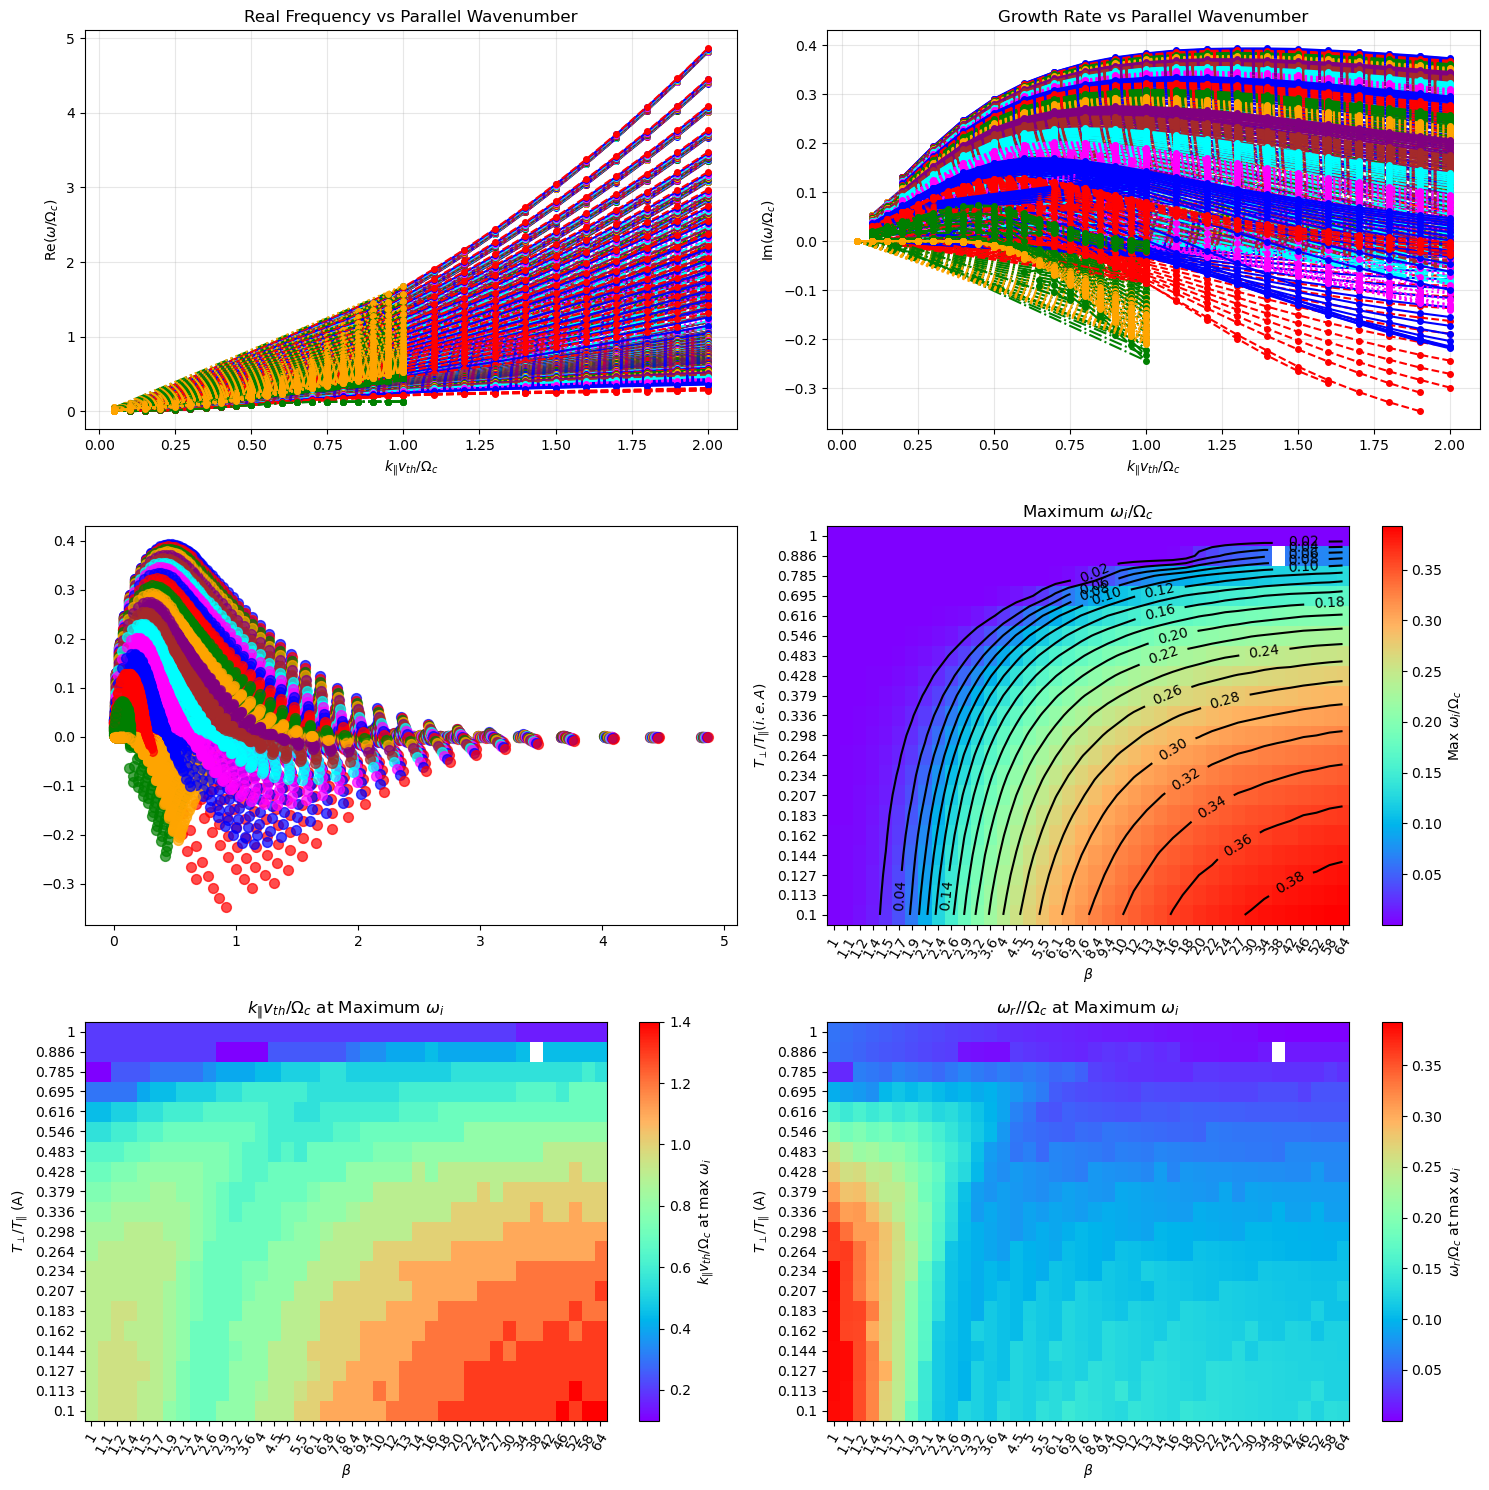

In [41]:
from matplotlib.colors import LogNorm

# Cell 5: Advanced visualization with separate lines for each A value
if df is not None:
    # Get unique A values
    a_values = sorted(df['A'].unique())
    beta_values = sorted(df['BETA'].unique())
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    
    # Plot 1: Real frequency vs z for different A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 0].plot(subset['z'], subset['omega_r'], 
                        color=colors[i % len(colors)], 
                        linestyle=linestyles[i % len(linestyles)],
                        marker='o', markersize=4, 
                        label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[0, 0].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 0].set_ylabel(r'$\mathrm{Re}(\omega/\Omega_c)$')
    axes[0, 0].set_title('Real Frequency vs Parallel Wavenumber')
    axes[0, 0].grid(True, alpha=0.3)
    #axes[0, 0].legend()
    
    # Plot 2: Imaginary frequency (growth rate) vs z for different A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 1].plot(subset['z'], subset['omega_i'], 
                        color=colors[i % len(colors)], 
                        linestyle=linestyles[i % len(linestyles)],
                        marker='o', markersize=4, 
                        label=f'A = {a_val} & BETA = {beta_val}')
    axes[0, 1].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 1].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[0, 1].set_title('Growth Rate vs Parallel Wavenumber')
    axes[0, 1].grid(True, alpha=0.3)
    #axes[0, 1].legend()
    
    # Plot 3: Complex frequency plane with different colors for A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            scatter = axes[1, 0].scatter(subset['omega_r'], subset['omega_i'], 
                                    c=colors[i % len(colors)], 
                                    s=50, alpha=0.7,
                                    label=f'A = {a_val} & BETA = {beta_val}')
    
   
    
    # Since A and BETA are not uniformly spaced, use imshow with aspect='auto' and set tick labels accordingly
    pivot = df.pivot_table(index='A', columns='BETA', values='omega_i', aggfunc='max')
    Xc, Yc = np.meshgrid(pivot.columns, pivot.index)
    

    #im = axes[1, 1].imshow(pivot, aspect='auto', origin='lower', cmap='rainbow')
    

    # Use logarithmic normalization for the colormap

    # To avoid issues with zeros or negative values, set a minimum positive value
    min_val = np.nanmin(pivot.values[pivot.values > 0])
    im = axes[1, 1].imshow(pivot, aspect='auto', origin='lower', cmap='rainbow') #, norm=LogNorm(vmin=min_val, vmax=np.nanmax(pivot.values)))
    cp = axes[1,1].contour(pivot.values, levels=20, colors='black')
    plt.colorbar(im, ax=axes[1, 1], label=r'Max $\omega_i/\Omega_c$')
    plt.clabel(cp, inline=True, fontsize=10, fmt="%.2f", colors='black')  # Add labels to contours in black
    # Set tick positions and labels to match the actual A and BETA values (logarithmic spacing)
    axes[1, 1].set_xticks(np.arange(len(pivot.columns)))
    axes[1, 1].set_xticklabels([f"{b:.2g}" for b in pivot.columns], rotation=60)
    axes[1, 1].set_yticks(np.arange(len(pivot.index)))
    axes[1, 1].set_yticklabels([f"{a:.3g}" for a in pivot.index])
    axes[1, 1].set_xlabel(r'$\beta$')
    axes[1, 1].set_ylabel(r'$T_\perp / T_{\|}  (i.e. A)$')
    axes[1, 1].set_title(r'Maximum $\omega_i/\Omega_c$')
    #axes[1, 1].set_xscale('log')
    #axes[1, 1].set_yscale('log')
    #plt.xticks(pivot.columns, rotation=90)
    #plt.yticks(pivot.index)

    # Find the index of the maximum omega_i for each (A, BETA) pair
    idx = df.groupby(['A', 'BETA'])['omega_i'].idxmax()
    # Get the corresponding z values
    max_z = df.loc[idx, ['A', 'BETA', 'z', 'omega_i']]
    # Pivot max_z to get z values for each (A, BETA)
    pivot_z = max_z.pivot(index='A', columns='BETA', values='z')
    im2 = axes[2,0].imshow(pivot_z, aspect='auto', origin='lower', cmap='rainbow')
    plt.colorbar(im2, ax=axes[2,0], label=r'$k_{\|} v_{th}/\Omega_c$ at max $\omega_i$')
    axes[2,0].set_xticks(np.arange(len(pivot_z.columns)))
    axes[2,0].set_xticklabels([f"{b:.2g}" for b in pivot_z.columns], rotation=60)
    axes[2,0].set_yticks(np.arange(len(pivot_z.index)))
    axes[2,0].set_yticklabels([f"{a:.3g}" for a in pivot_z.index])
    axes[2,0].set_xlabel(r'$\beta$')
    axes[2,0].set_ylabel(r'$T_\perp / T_{\|}$ (A)')
    axes[2,0].set_title(r'$k_{\|} v_{th}/\Omega_c$ at Maximum $\omega_i$')



    # Get the corresponding z values
    max_omega_r = df.loc[idx, ['A', 'BETA', 'omega_r', 'omega_i']]

    # Pivot max_z to get z values for each (A, BETA)
    pivot_omega_r = max_omega_r.pivot(index='A', columns='BETA', values='omega_r')

    im3 = axes[2,1].imshow(pivot_omega_r, aspect='auto', origin='lower', cmap='rainbow')

    plt.colorbar(im, ax=axes[2,1], label=r'$\omega_r/\Omega_c$ at max $\omega_i$')
    axes[2,1].set_xticks(np.arange(len(pivot_omega_r.columns)))
    axes[2,1].set_xticklabels([f"{b:.2g}" for b in pivot_omega_r.columns], rotation=60)
    axes[2,1].set_yticks(np.arange(len(pivot_omega_r.index)))
    axes[2,1].set_yticklabels([f"{a:.3g}" for a in pivot_omega_r.index])
    axes[2,1].set_xlabel(r'$\beta$')
    axes[2,1].set_ylabel(r'$T_\perp / T_{\|}$ (A)')
    axes[2,1].set_title(r'$\omega_r//\Omega_c$ at Maximum $\omega_i$')
    
    plt.tight_layout()
    plt.show()

In [121]:
from plotly.subplots import make_subplots

import plotly.graph_objs as go


if df is not None:
    # Prepare figure with 2x2 subplots
    fig_plotly = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            "Real Frequency vs Parallel Wavenumber",
            "Growth Rate vs Parallel Wavenumber",
            "Complex Frequency Plane",
            "Growth Rate Comparison (Interpolated)"
        ),
        horizontal_spacing=0.15,
        vertical_spacing=0.15
    )

    # Plot 1: Real frequency vs z for different A and BETA values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            if not subset.empty:
                fig_plotly.add_trace(
                    go.Scatter(
                        x=subset['z'],
                        y=subset['omega_r'],
                        mode='lines+markers',
                        name=f'A={a_val}, BETA={beta_val}',
                        legendgroup=f'A={a_val},BETA={beta_val}',
                        marker=dict(size=6),
                        hovertemplate=(
                            'A=%{customdata[0]}<br>BETA=%{customdata[1]}<br>z=%{x}<br>omega_r=%{y}'
                        ),
                        customdata=np.stack([subset['A'], subset['BETA']], axis=-1)
                    ),
                    row=1, col=1
                )

    # Plot 2: Imaginary frequency (growth rate) vs z
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            if not subset.empty:
                fig_plotly.add_trace(
                    go.Scatter(
                        x=subset['z'],
                        y=subset['omega_i'],
                        mode='lines+markers',
                        name=f'A={a_val}, BETA={beta_val}',
                        legendgroup=f'A={a_val},BETA={beta_val}',
                        marker=dict(size=6),
                        hovertemplate=(
                            'A=%{customdata[0]}<br>BETA=%{customdata[1]}<br>z=%{x}<br>omega_i=%{y}'
                        ),
                        customdata=np.stack([subset['A'], subset['BETA']], axis=-1)
                    ),
                    row=1, col=2
                )

    # Plot 3: Complex frequency plane
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            if not subset.empty:
                fig_plotly.add_trace(
                    go.Scatter(
                        x=subset['omega_r'],
                        y=subset['omega_i'],
                        mode='markers+lines',
                        name=f'A={a_val}, BETA={beta_val}',
                        legendgroup=f'A={a_val},BETA={beta_val}',
                        marker=dict(size=6),
                        hovertemplate=(
                            'A=%{customdata[0]}<br>BETA=%{customdata[1]}<br>omega_r=%{x}<br>omega_i=%{y}'
                        ),
                        customdata=np.stack([subset['A'], subset['BETA']], axis=-1)
                    ),
                    row=2, col=1
                )

    # Plot 4: Growth rate comparison at specific k_parallel values (interpolated)
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            if not subset.empty:
                # Interpolate growth rate for common z values
                omega_i_interp = np.interp(z_common, subset['z'], subset['omega_i'])
                fig_plotly.add_trace(
                    go.Scatter(
                        x=z_common,
                        y=omega_i_interp,
                        mode='lines',
                        name=f'A={a_val}, BETA={beta_val}',
                        legendgroup=f'A={a_val},BETA={beta_val}',
                        hovertemplate=(
                            'A=%{customdata[0]}<br>BETA=%{customdata[1]}<br>z=%{x}<br>omega_i=%{y}'
                        ),
                        customdata=np.stack([np.full_like(z_common, a_val), np.full_like(z_common, beta_val)], axis=-1)
                    ),
                    row=2, col=2
                )
    # Add horizontal line at y=0 for subplot 4
    fig_plotly.add_trace(
        go.Scatter(
            x=[z_common.min(), z_common.max()],
            y=[0, 0],
            mode='lines',
            line=dict(color='black', dash='dot'),
            showlegend=False,
            hoverinfo='skip'
        ),
        row=2, col=2
    )

    # Update layout to use MathJax
    fig_plotly.update_layout(
        height=900, width=1400,
        title_text="WHAMP Parallel Firehose Instability Results (Plotly)",
        legend=dict(itemsizing='constant', font=dict(size=10)),
        hovermode='closest',
        # Enable MathJax
        font=dict(family="Computer Modern", size=12),
    )
    # Update axes labels and layout
    # Use proper LaTeX syntax
    fig_plotly.update_xaxes(title_text=r"$k_{\|} v_{th} / \Omega_c$", row=1, col=1)
    fig_plotly.update_yaxes(title_text=r"$Re(\omega/\Omega_c)$", row=1, col=1)
    fig_plotly.update_xaxes(title_text=r"$k_{\|} v_{th} / \Omega_c$", row=1, col=2)
    fig_plotly.update_yaxes(title_text=r"${Im}(\omega/\Omega_c)$", row=1, col=2)
    fig_plotly.update_xaxes(title_text=r"${Re}(\omega/\Omega_c)$", row=2, col=1)
    fig_plotly.update_yaxes(title_text=r"${Im}(\omega/\Omega_c)$", row=2, col=1)
    fig_plotly.update_xaxes(title_text=r"$k_{\|} v_{th} / \Omega_c$", row=2, col=2)
    fig_plotly.update_yaxes(title_text=r"${Im}(\omega/\Omega_c)$", row=2, col=2)
    """
        fig_plotly.update_layout(
            height=900, width=1400,
            title_text="WHAMP Parallel Firehose Instability Results (Plotly)",
            legend=dict(itemsizing='constant', font=dict(size=10)),
            hovermode='closest'
        )
    """
    fig_plotly.show()